In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sqlalchemy import create_engine

server = 'LAPTOP-VGKTVTV2'  # double backslash important
database = 'db_churn'       # apna actual database name likho



In [4]:
connection_string = f"mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
engine = create_engine(connection_string)


In [5]:
view_query = "SELECT * FROM vw_churndata"  # apni table ka naam likho
churn_data = pd.read_sql(view_query, engine)

In [6]:
churn_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [7]:
churn_data['Customer_Status'].unique()


array(['Stayed', 'Churned'], dtype=object)

In [8]:
churn_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [9]:
#Data Preprocessing
# drop columns that would not be used for prediction 
# customer_id ->simple number col h koi use nhi h iska 

# churn_cateogry and churn reason these are directly related to target variable-customer status
# They are only available after the customer has already churned.
# Including them would be like "cheating" — the model would learn information about the outcome (Customer_Status) 
# from post-churn explanations.
# They're highly correlated with the target, so including them causes data leakage.

data=churn_data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

# list of columns to be label-encoded(convert categorial var to numerical var) as algo are bad to read categorial info
columns_to_encode = [
'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
'Payment_Method']




In [10]:
# Encode categorical variables except the target variable

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder() #For each column, you create a new LabelEncoder and store it in the dictionary
    # Alag encoder banate hain kyunki har column ke categories alag hote hain,
    # aur ek encoder sirf ek column ke liye hi sahi tarike se kaam karega. else
    # Model will get confused — it thinks all values come from one single column, which is wrong.
    
    data[column] = label_encoders[column].fit_transform(data[column])
    # Fit the label encoder on that column’s data (i.e., learn all unique values).
    # Transform the text values into integers.
    # Replace the original column in the DataFrame with these integers.



In [11]:
# Manually encode the target variable 'Customer_Status' ------------------>because
 # label encoder assign numerical values in alphabetical order and acc to that if we use that for target varaible 
# then churn-0 and stayed-1 but we want to predict churn so we code it as 1 

data['Customer_Status']=data['Customer_Status'].map({'Stayed':0,'Churned':1})

In [12]:
# Split data into features and target

X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']
y.tail()


6002    0
6003    0
6004    0
6005    0
6006    0
Name: Customer_Status, dtype: int64

In [13]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
 # Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# intialize the random forest classifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42) #n_estimators->100 decision trees
# train the model
rf_model.fit(X_train,y_train)


# Make predictions
y_pred=rf_model.predict(X_test)




Confusion Matrix:
[[814  50]
 [112 226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       864
           1       0.82      0.67      0.74       338

    accuracy                           0.87      1202
   macro avg       0.85      0.81      0.82      1202
weighted avg       0.86      0.87      0.86      1202



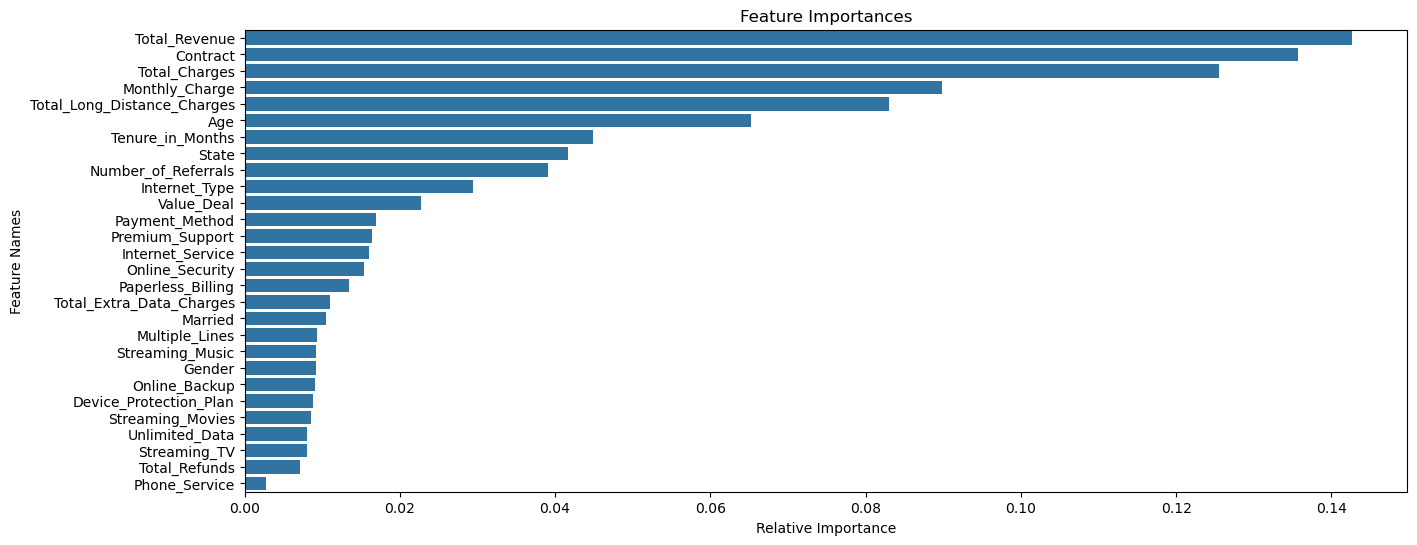

In [15]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()


In [16]:
#precision ,recall and f1score all are higher of class 0 more than class 1 it means model is better in predicting the customer who will 
# stay than chustomer who churn becz of the imbalance in supoort values 
# Accuracy: 0.84
# Out of all 1202 total samples, the model predicted correctly for 84% of them.

# Formula: (TP+ TN)/total 
# Good for balanced data, but can be misleading for imbalanced classes.

#macro aveage -> It’s the simple average (mean) of precision, recall, and F1 across all classes, treating each class equally,
# regardless of how many samples each class has.

# feaure importance ---> plotting the importance of each feature (included) to create the model .
# overfit->it learned the test dataset so well that its predicting at very high % level  but when u give it new dataset Eeverthing falls apart.
# so then do fine tune the model one way of fine tuning is
# fine tuning-> remove all features which have importance less than 0.01 (remove features which u think are not imp becz unnecessary feature 
# addition can reduce the accuracy of the model) 
# 0.01 ->benchmark is something which is flexible and can change acc to requirements.


In [17]:
join_data = pd.read_sql("SELECT * FROM vw_JoinData", engine)
join_data.head()  # ← don't wrap in print()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,16032-AND,Female,47,No,Andhra Pradesh,8,18,None,Yes,No,...,Bank Withdrawal,46.599998,87.900002,0.0,0,3.74,91.639999,Joined,Others,Others
1,16068-BIH,Female,44,Yes,Bihar,4,25,Deal 5,No,No,...,Bank Withdrawal,25.250000,25.250000,0.0,10,0.00,35.250000,Joined,Others,Others
2,16244-UTT,Female,19,Yes,Uttar Pradesh,5,7,None,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,5.10,24.650000,Joined,Others,Others
3,18415-KAR,Female,33,Yes,Karnataka,7,36,None,Yes,No,...,Mailed Check,19.100000,19.100000,0.0,0,5.02,24.120001,Joined,Others,Others
4,19041-AND,Female,36,No,Andhra Pradesh,6,21,Deal 5,No,No,...,Credit Card,35.099998,101.099998,0.0,0,0.00,101.099998,Joined,Others,Others


In [18]:
join_data['Customer_Status'].unique()


array(['Joined'], dtype=object)

In [19]:
# 1. Keep a copy of the original data
original_data = join_data.copy()

# 2. Keep the Customer_ID column separately (optional)
customer_ids = join_data['Customer_ID']



In [22]:
# 3. Drop columns not used in prediction
columns_to_drop = ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason']
join_data = join_data.drop(columns=columns_to_drop, errors='ignore')

# 4. Encode categorical variables using saved label_encoders
for column in join_data.select_dtypes(include='object').columns:
    join_data[column] = label_encoders[column].transform(join_data[column])


In [24]:

# 5. Make predictions using the trained model
new_predictions = rf_model.predict(join_data)

# 6. Add predictions to original data
original_data['Customer_Status_Predicted'] = new_predictions

# 7. Keep only predicted churned customers (1 = churned)
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

# 8. Save churned customer data to CSV
churned_customers.to_csv("Predictions.csv", index=False)



print("✅ Churned customer predictions saved successfully.")


✅ Churned customer predictions saved successfully.
